# Assignment 1

First we need to import a few modules, execute the cell below:

In [3]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [4]:
import numpy as np
def f(x):
    z = np.cos(x)
    return z

You can use the following cell to check that your code works for scalar arguments:

In [5]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [6]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [7]:
import numpy as np

def df_analytic(x):
    df = -1 * np.sin(x)
    return df

In [8]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [9]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [10]:
import numpy as np
def backward_difference(f, x, dx):
    deriv = (f(x)-f(x-dx))/dx
    return deriv

In [11]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


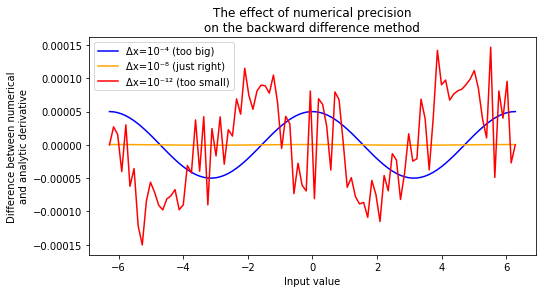

In [20]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)

df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_2 = backward_difference(f, xs, dx=1e-6)
df_dx_3 = backward_difference(f, xs, dx=1e-12)


df_dx_analytical = df_analytic(xs)

plt.figure(figsize=(8, 4))

plt.xlabel('Input value')
plt.ylabel('Difference between numerical\nand analytic derivative')
plt.title('The effect of numerical precision\non the backward difference method')

plt.plot(xs, df_dx_1 - df_dx_analytical, 'blue', label = '\u0394x=10\u207b\u2074 (too big)')
plt.plot(xs, df_dx_2 - df_dx_analytical, 'orange', label = '\u0394x=10\u207b\u2078 (just right)')
plt.plot(xs, df_dx_3 - df_dx_analytical, 'red', label = '\u0394x=10\u207b\u00b9\u00b2 (too small)')

plt.legend(loc='upper left')

plt.show()

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


In the case where $\Delta x$ is too large, the finite difference method no longer holds.  This is because the definition of a derivative (which is used in the finite difference method) uses a limit that requires a value to tend towards zero for the approximation to work accurately.  Therefore, if $\Delta x$ is not sufficiently small, there will be significant error between the numerical solution and the analytical derivative.

When $\Delta x$ is too small, accuracy is lost due to computational problems (rather than mathematical issues).  $\Delta x$ is stored as a floating point number (in binary) - a system that can only store a finite number of digits (due to limited memory and processing power).  When the finite difference method is used with very, very small $\Delta x$, digits from the calculation are lost as numerical round-off errors.  Rounding errors naturally occur most in calculations involving very small numbers because these numbers are more susceptible to small changes away from their specified value (particularly when taking reciprocals).  These errors are then propagated throughout the calculation, leading to a final answer that is inconsistent with the true value (where no rounding has occurred).